# Сбор датасета

## Cбор датасета из 5 млн песен и далее из 160 - тетрадка запускалась на Kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_full = pd.read_csv("/kaggle/input/genius-song-lyrics-with-language-information/song_lyrics.csv", encoding='utf8')

In [ ]:
# сбор датасета на 160k песен

In [ ]:
df_1970_2023 = df_full[(df_full['language'] == 'ru') & (df_full['year'] >= 1970) & (df_full['year'] <= 2023) & (df_full['tag'] != 'misc')].sort_values(by=['year'], ascending=True)


### Визуализации количественных распределений данных в корпусе

In [ ]:
import matplotlib.pyplot as plt
import collections
import pandas_profiling
import re

In [ ]:
df_1985_1994 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 1985) & (df['year'] <= 1994)]
df_1995_2004 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 1995) & (df['year'] <= 2004)]
df_2005_2014 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 2005) & (df['year'] <= 2014)]
df_2015_2023 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 2014) & (df['year'] <= 2023)]

### Распределение данных по объёму

In [ ]:
# Абсолютное распределение данных

In [ ]:
colors = ['darkslateblue', 'cornflowerblue', 'palevioletred']
period = ['1985-1994','1995-2004','2005-2014','2015-2023']
rock = [len(df_1985_1994['tag'] == 'rock'), len(df_1995_2004[(df_1995_2004['tag'] == 'rock')]),
       len(df_2005_2014[(df_2005_2014['tag'] == 'rock')]), len(df_2015_2023[(df_2015_2023['tag'] == 'rock')])]
rap = [len(df_1985_1994[(df_1985_1994['tag'] == 'rap')]), len(df_1995_2004[(df_1995_2004['tag'] == 'rap')]),
       len(df_2005_2014[(df_2005_2014['tag'] == 'rap')]), len(df_2015_2023[(df_2015_2023['tag'] == 'rap')])]
pop = [len(df_1985_1994[(df_1985_1994['tag'] == 'pop')]), len(df_1995_2004[(df_1995_2004['tag'] == 'pop')]),
       len(df_2005_2014[(df_2005_2014['tag'] == 'pop')]), len(df_2015_2023[(df_2015_2023['tag'] == 'pop')])]

x_axis = np.arange(len(period))

# Multi bar Chart

plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')

# Xticks

plt.xticks(x_axis+0.2, period)

# Add x and ylabels
plt.xlabel('Периодизация')
plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Абсолютное распределение данных в корпусе",
          fontsize=15,
          color="black")
# Add legend

plt.legend()

# Display

plt.show()

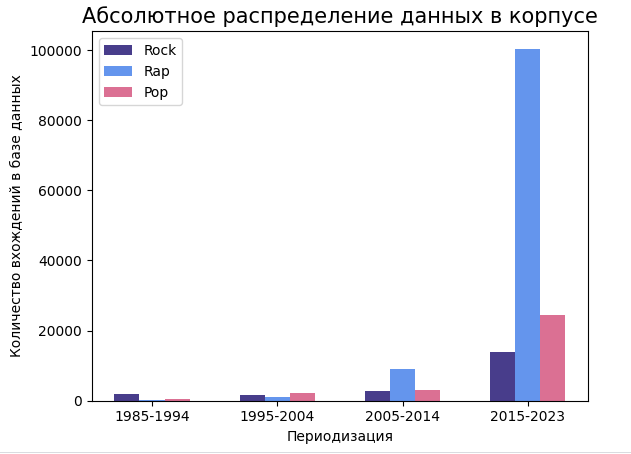

In [ ]:
# Относительное распределение данных в корпусе

In [ ]:
colors = ['darkslateblue', 'cornflowerblue', 'palevioletred']
period = ['1985-1994','1995-2004','2005-2014','2015-2023']

rock = [len(df_1985_1994[(df_1985_1994['tag'] == 'rock')])/len(df_1985_1994),
        len(df_1995_2004[(df_1995_2004['tag'] == 'rock')])/len(df_1995_2004),
       len(df_2005_2014[(df_2005_2014['tag'] == 'rock')])/len(df_2005_2014),
        len(df_2015_2023[(df_2015_2023['tag'] == 'rock')])/len(df_2015_2023)]

rap = [len(df_1985_1994[(df_1985_1994['tag'] == 'rap')])/len(df_1985_1994),
       len(df_1995_2004[(df_1995_2004['tag'] == 'rap')])/len(df_1995_2004),
       len(df_2005_2014[(df_2005_2014['tag'] == 'rap')])/len(df_2005_2014),
       len(df_2015_2023[(df_2015_2023['tag'] == 'rap')])/len(df_2015_2023)]

pop = [len(df_1985_1994[(df_1985_1994['tag'] == 'pop')])/len(df_1985_1994),
       len(df_1995_2004[(df_1995_2004['tag'] == 'pop')])/len(df_1995_2004),
       len(df_2005_2014[(df_2005_2014['tag'] == 'pop')])/len(df_2005_2014),
       len(df_2015_2023[(df_2015_2023['tag'] == 'pop')])/len(df_2015_2023)]

x_axis = np.arange(len(period))

# Multi bar Chart

plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')

# Xticks

plt.xticks(x_axis+0.2, period)

# Add x and ylabels
plt.xlabel('Периодизация')
plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Относительное распределение данных в корпусе",
          fontsize=15,
          color="black")
# Add legend

plt.legend()

# Display

plt.show()

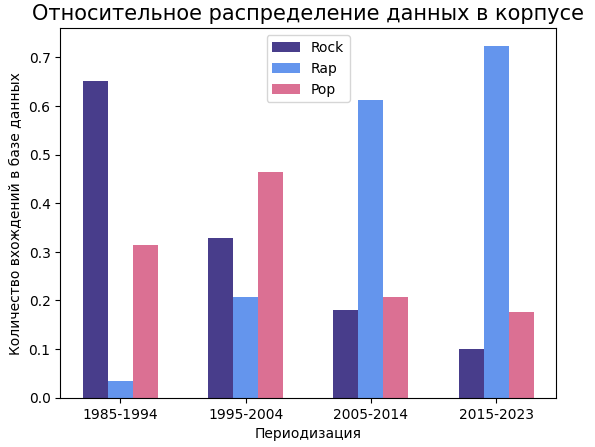

### Распределение данных по прослушиванию

In [ ]:
# Относительное распределение данных по прослушиваниям

In [ ]:
colors = ['darkslateblue', 'cornflowerblue', 'palevioletred']
period = ['1985-1994','1995-2004','2005-2014','2015-2023']


rock = [df_1985_1994[(df_1985_1994['tag'] == 'rock')]['views'].sum()/df_1985_1994[(df_1985_1994['tag'] == 'rock') | (df_1985_1994['tag'] == 'rap') | (df_1985_1994['tag'] == 'pop')]['views'].sum(),
        df_1995_2004[(df_1995_2004['tag'] == 'rock')]['views'].sum()/df_1995_2004[(df_1995_2004['tag'] == 'rock') | (df_1995_2004['tag'] == 'rap') | (df_1995_2004['tag'] == 'pop')]['views'].sum(),
       df_2005_2014[(df_2005_2014['tag'] == 'rock')]['views'].sum()/df_2005_2014[(df_2005_2014['tag'] == 'rock') | (df_2005_2014['tag'] == 'rap') | (df_2005_2014['tag'] == 'pop')]['views'].sum(),
        df_2015_2023[(df_2015_2023['tag'] == 'rock')]['views'].sum()/df_2015_2023[(df_2015_2023['tag'] == 'rock') | (df_2015_2023['tag'] == 'rap') | (df_2015_2023['tag'] == 'pop')]['views'].sum()]

rap = [df_1985_1994[(df_1985_1994['tag'] == 'rap')]['views'].sum()/df_1985_1994[(df_1985_1994['tag'] == 'rock') | (df_1985_1994['tag'] == 'rap') | (df_1985_1994['tag'] == 'pop')]['views'].sum(),
       df_1995_2004[(df_1995_2004['tag'] == 'rap')]['views'].sum()/df_1995_2004[(df_1995_2004['tag'] == 'rock') | (df_1995_2004['tag'] == 'rap') | (df_1995_2004['tag'] == 'pop')]['views'].sum(),
       df_2005_2014[(df_2005_2014['tag'] == 'rap')]['views'].sum()/df_2005_2014[(df_2005_2014['tag'] == 'rock') | (df_2005_2014['tag'] == 'rap') | (df_2005_2014['tag'] == 'pop')]['views'].sum(),
       df_2015_2023[(df_2015_2023['tag'] == 'rap')]['views'].sum()/df_2015_2023[(df_2015_2023['tag'] == 'rock') | (df_2015_2023['tag'] == 'rap') | (df_2015_2023['tag'] == 'pop')]['views'].sum(),]

pop = [df_1985_1994[(df_1985_1994['tag'] == 'pop')]['views'].sum()/df_1985_1994[(df_1985_1994['tag'] == 'rock') | (df_1985_1994['tag'] == 'rap') | (df_1985_1994['tag'] == 'pop')]['views'].sum(),
       df_1995_2004[(df_1995_2004['tag'] == 'pop')]['views'].sum()/df_1995_2004[(df_1995_2004['tag'] == 'rock') | (df_1995_2004['tag'] == 'rap') | (df_1995_2004['tag'] == 'pop')]['views'].sum(),
       df_2005_2014[(df_2005_2014['tag'] == 'pop')]['views'].sum()/df_2005_2014[(df_2005_2014['tag'] == 'rock') | (df_2005_2014['tag'] == 'rap') | (df_2005_2014['tag'] == 'pop')]['views'].sum(),
       df_2015_2023[(df_2015_2023['tag'] == 'pop')]['views'].sum()/df_2015_2023[(df_2015_2023['tag'] == 'rock') | (df_2015_2023['tag'] == 'rap') | (df_2015_2023['tag'] == 'pop')]['views'].sum()]

x_axis = np.arange(len(period))
plt.ticklabel_format(style='plain')

# Multi bar Chart

plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')

# Xticks

plt.xticks(x_axis+0.2, period)

# Add x and ylabels
plt.xlabel('Периодизация')
plt.ylabel('Доля прослушиваний по жанрам')
plt.title(label="Относительное распределение данных о прослушивании",
          fontsize=15,
          color="black")
# Add legend

plt.legend()

# Display

plt.show()

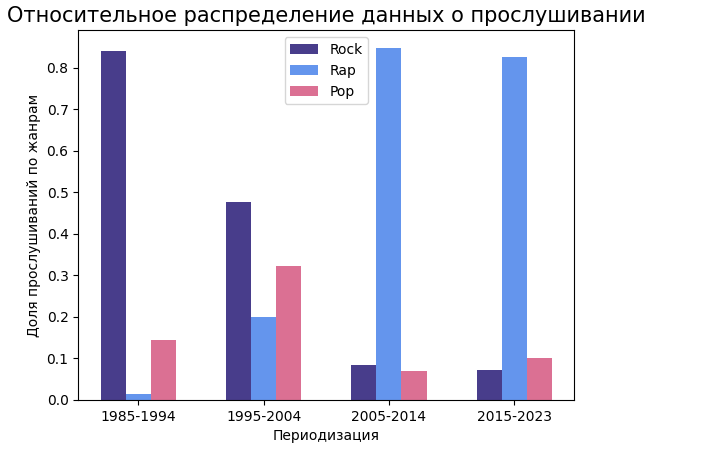

### Средние значения по прослушиваниям по временным периодам

#### 1985-1994

In [ ]:
x1 = [df_1985_1994[(df_1985_1994['tag'] == 'rap')]['year']]
x2 =[df_1985_1994[(df_1985_1994['tag'] == 'rock')]['year']]
x3 = [df_1985_1994[(df_1985_1994['tag'] == 'pop')]['year']]

y1 = [df_1985_1994[(df_1985_1994['tag'] == 'rap')]['views']]
y2 =[df_1985_1994[(df_1985_1994['tag'] == 'rock')]['views']]
y3 = [df_1985_1994[(df_1985_1994['tag'] == 'pop')]['views']]

m = [df_1985_1994['views']]
mean=np.nanmean(m) #1674
median=np.median(m) #116

plt.ticklabel_format(style='plain')
plt.scatter(x1, y1, label = 'rap', color='cornflowerblue')
plt.scatter(x2, y2, label='rock',color='darkslateblue')
plt.scatter(x3, y3, label='pop',color='palevioletred')

plt.axhline(mean, color='red', linestyle='--', linewidth=3, label='Avg')
plt.axhline(median, color='lime', linestyle='--', linewidth=3, label='Median')

plt.title('Диаграмма рассеяния данных по прослушиваниям за 1985-1994')
plt.xlabel('Периодизация')
plt.ylabel('Количество прослушиваний')
plt.legend()

# Print the chart
plt.show()

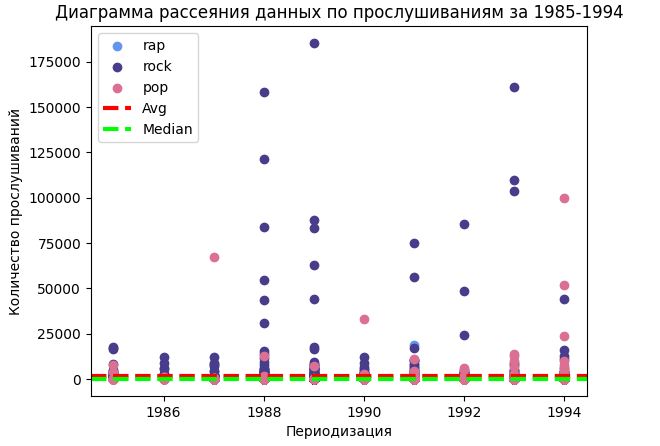

#### 1995 - 2004

In [ ]:
x1 = [df_1995_2004[(df_1995_2004['tag'] == 'rap')]['year']]
x2 =[df_1995_2004[(df_1995_2004['tag'] == 'rock')]['year']]
x3 = [df_1995_2004[(df_1995_2004['tag'] == 'pop')]['year']]

y1 = [df_1995_2004[(df_1995_2004['tag'] == 'rap')]['views']]
y2 =[df_1995_2004[(df_1995_2004['tag'] == 'rock')]['views']]
y3 = [df_1995_2004[(df_1995_2004['tag'] == 'pop')]['views']]

m = [df_1995_2004['views']]
mean=np.nanmean(m) #1674
median=np.median(m) #116

plt.ticklabel_format(style='plain')
plt.scatter(x1, y1, label = 'rap', color='cornflowerblue')
plt.scatter(x2, y2, label='rock',color='darkslateblue')
plt.scatter(x3, y3, label='pop',color='palevioletred')

plt.axhline(mean, color='red', linestyle='--', linewidth=3, label='Avg')
plt.axhline(median, color='lime', linestyle='--', linewidth=3, label='Median')

plt.title('Диаграмма рассеяния данных по прослушиваниям за 1995-2004')
plt.xlabel('Периодизация')
plt.ylabel('Количество прослушиваний')
plt.legend()

# Print the chart
plt.show()

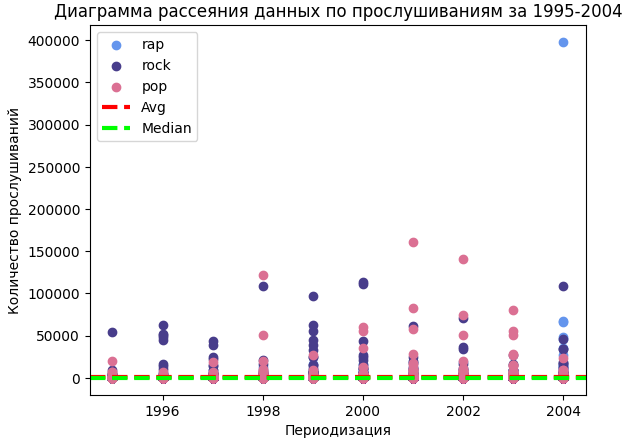

#### 2005-2014

In [ ]:
x1 = [df_2005_2014[(df_2005_2014['tag'] == 'rap')]['year']]
x2 =[df_2005_2014[(df_2005_2014['tag'] == 'rock')]['year']]
x3 = [df_2005_2014[(df_2005_2014['tag'] == 'pop')]['year']]

y1 = [df_2005_2014[(df_2005_2014['tag'] == 'rap')]['views']]
y2 =[df_2005_2014[(df_2005_2014['tag'] == 'rock')]['views']]
y3 = [df_2005_2014[(df_2005_2014['tag'] == 'pop')]['views']]

m = [df_2005_2014['views']]
mean=np.nanmean(m) #2712.8903320835566
median=np.median(m) #146.0

plt.ticklabel_format(style='plain')
plt.scatter(x1, y1, label = 'rap', color='cornflowerblue')
plt.scatter(x2, y2, label='rock',color='darkslateblue')
plt.scatter(x3, y3, label='pop',color='palevioletred')

plt.axhline(mean, color='red', linestyle='--', linewidth=3, label='Avg')
plt.axhline(median, color='lime', linestyle='--', linewidth=3, label='Median')

plt.title('Диаграмма рассеяния данных по прослушиваниям за 2005-2014')
plt.xlabel('Периодизация')
plt.ylabel('Количество прослушиваний')
plt.legend()

# Print the chart
plt.show()

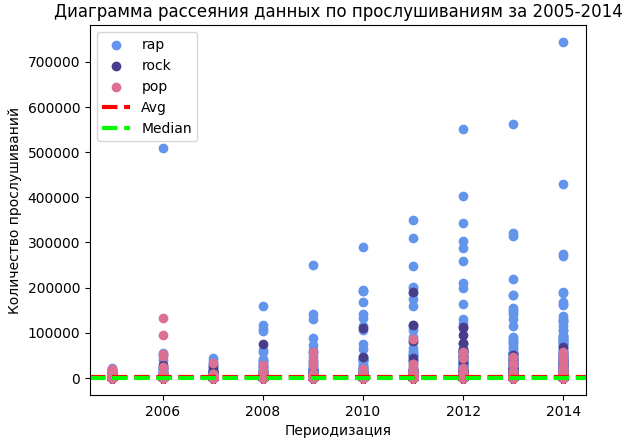

#### 2015-2023

In [ ]:
x1 = [df_2015_2023[(df_2015_2023['tag'] == 'rap')]['year']]
x2 =[df_2015_2023[(df_2015_2023['tag'] == 'rock')]['year']]
x3 = [df_2015_2023[(df_2015_2023['tag'] == 'pop')]['year']]

y1 = [df_2015_2023[(df_2015_2023['tag'] == 'rap')]['views']]
y2 =[df_2015_2023[(df_2015_2023['tag'] == 'rock')]['views']]
y3 = [df_2015_2023[(df_2015_2023['tag'] == 'pop')]['views']]

m = [df_2015_2023['views']]
mean=np.nanmean(m) #3654.484503975835
median=np.median(m) #64.0

plt.ticklabel_format(style='plain')
plt.scatter(x1, y1, label = 'rap', color='cornflowerblue')
plt.scatter(x2, y2, label='rock',color='darkslateblue')
plt.scatter(x3, y3, label='pop',color='palevioletred')

plt.axhline(mean, color='red', linestyle='--', linewidth=3, label='Avg')
plt.axhline(median, color='lime', linestyle='--', linewidth=3, label='Median')

plt.title('Диаграмма рассеяния данных по прослушиваниям за 2015-2023')
plt.xlabel('Периодизация')
plt.ylabel('Количество прослушиваний')
plt.legend()

# Print the chart
plt.show()

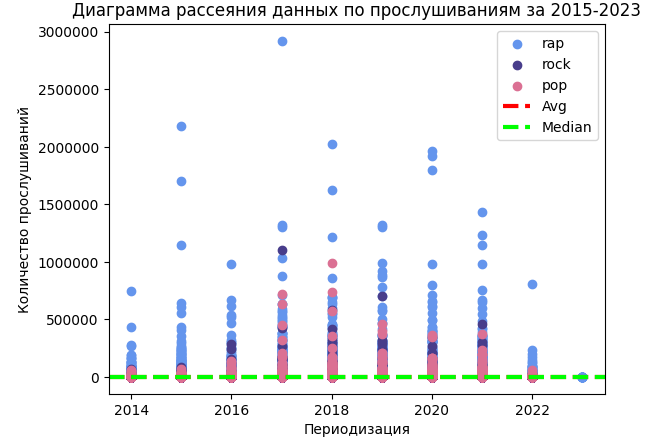

### Сокращение данных по прослушиванию по периодам по Q3 (топ25% по количеству прослушиваний)

In [ ]:
df_1985_1994['views'].describe()

# count      2011.000000
# mean       1674.956241
# std        9945.692652
# min           0.000000
# 25%          30.000000
# 50%         116.000000
# 75%         541.500000 --> Q3 - 542
# max      185361.000000

In [ ]:
df_1995_2004['views'].describe()

# count      4900.000000
# mean       1350.138571
# std        9061.612533
# min           0.000000
# 25%          21.000000
# 50%          77.000000
# 75%         354.000000 --> Q3 - 354
# max      397872.000000

In [ ]:
df_2005_2014['views'].describe()

# count     14936.000000
# mean       2712.890332
# std       17874.531230
# min           0.000000
# 25%          36.000000
# 50%         146.000000
# 75%         666.000000 --> Q3 - 666
# max      743765.000000

In [ ]:
df_2015_2023['views'].describe()

# count    1.387130e+05
# mean     3.654485e+03
# std      3.007957e+04
# min      0.000000e+00
# 25%      1.700000e+01
# 50%      6.400000e+01
# 75%      4.930000e+02 --> Q3 - 493
# max      2.920314e+06

### Сбор датасета для работы

In [ ]:
############## Тут мы задаем подкорпусы ##############################
df_1985_1994_top = df_1985_1994[(df_1985_1994['views']>=542)]
df_1995_2004_top = df_1995_2004[(df_1995_2004['views']>=354)]
df_2005_2014_top = df_2005_2014[(df_2005_2014['views']>=666)]
df_2015_2023_top = df_2015_2023[(df_2015_2023['views']>=493)]

df_1985_2023_top = pd.concat([df_1985_1994_top, df_1995_2004_top, df_2005_2014_top, df_2015_2023_top])

In [ ]:
#df_1985_2023_top.to_csv('ru_1985_2023_40k_songs.csv, encoding='utf8')